# Task №2. Задание №2 (Практика)


## Yenglik Kadyr, Astana IT University, Big Data Analysis - 1903 group

### *** Задача:***
#### + Построить Neural Network Model испольуя датасет

### Dataset taken from: https://www.kaggle.com/uciml/mushroom-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
mushrooms_data = pd.read_csv('mushrooms.csv')

In [3]:
mushrooms_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushrooms_data.shape

(8124, 23)

In [5]:
mushrooms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
mushrooms_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushrooms_data.corr

<bound method DataFrame.corr of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [8]:
mushrooms_data.groupby(['class', 'odor']).count()

cap-shape  cap-surface  cap-color  bruises  gill-attachment  \
class odor                                                                
e     a           400          400        400      400              400   
      l           400          400        400      400              400   
      n          3408         3408       3408     3408             3408   
p     c           192          192        192      192              192   
      f          2160         2160       2160     2160             2160   
      m            36           36         36       36               36   
      n           120          120        120      120              120   
      p           256          256        256      256              256   
      s           576          576        576      576              576   
      y           576          576        576      576              576   

            gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  ...  \
class odor                                                                ...   
e     a              400        400         400          400         400  ...   
      l              400        400         400          400         400  ...   
      n             3408       3408        3408         3408        3408  ...   
p     c              192        192         192          192         192  ...   
      f             2160       2160        2160         2160        2160  ...   
      m               36         36          36           36          36  ...   
      n              120        120         120          120         120  ...   
      p              256        256         256          256         256  ...   
      s              576        576         576          576         576  ...   
      y              576        576         576          576         576  ...   

            stalk-surface-below-ring  stalk-color-above-ring  \
class odor                                                     
e     a                          400                     400   
      l                          400                     400   
      n                         3408                    3408   
p     c                          192                     192   
      f                         2160                    2160   
      m                           36                      36   
      n                          120                     120   
      p                          256                     256   
      s                          576                     576   
      y                          576                     576   

            stalk-color-below-ring  veil-type  veil-color  ring-number  \
class odor                                                               
e     a                        400        400         400          400   
      l                        400        400         400          400   
      n                       3408       3408        3408         3408   
p     c                        192        192         192          192   
      f                       2160       2160        2160         2160   
      m                         36         36          36           36   
      n                        120        120         120          120   
      p                        256        256         256          256   
      s                        576        576         576          576   
      y                        576        576         576          576   

            ring-type  spore-print-color  population  habitat  
class odor                                                     
e     a           400                400         400      400  
      l           400                400         400      400  
      n          3408               3408        3408     3408  
p     c           192                192         192      192  
      f          2160               2160        2160     2160  
      m            36           

In [9]:
labels = mushrooms_data['class']

labels[0:5]

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [10]:
feature_columns = mushrooms_data.drop(columns = ['class']) 

feature_columns[0:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [11]:
labels.replace('p', 0, inplace = True)
labels.replace('e', 1, inplace = True)

labels[0:5]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [12]:
feature_columns = pd.get_dummies(feature_columns)

feature_columns[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
feature_columns = feature_columns.values.astype('float32')

labels = labels.values.astype('float32')

## Train and Test Split

In [14]:
feature_columns_train, feature_columns_test, labels_train, labels_test = train_test_split(feature_columns, labels, test_size=0.3)

In [15]:
feature_columns_train, feature_columns_validation, labels_train, labels_validation = train_test_split(feature_columns_train, labels_train, test_size=0.3)

## Build a Model

In [16]:
model = keras.Sequential([keras.layers.Dense(32, input_shape = (117,)), 
                         keras.layers.Dense(20, activation = tf.nn.relu),
                         keras.layers.Dense(2, activation = 'softmax')])

In [17]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [18]:
history = model.fit(feature_columns_train, labels_train, epochs = 20, validation_data = (feature_columns_validation, labels_validation))

Epoch 1/20
125/125 [==============================] - 4s 26ms/step - loss: 0.3066 - acc: 0.8920 - val_loss: 0.0381 - val_acc: 0.9924
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0264 - acc: 0.9972 - val_loss: 0.0117 - val_acc: 0.9994
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 7/20
125/125 [==============================] - 0s 3ms/step - loss: 9.7584e-04 - acc: 1.0000 - val_loss: 9.3517e-04 - val_acc: 1.0000
Epoch 8/20
125/125 [==============================] - 0s 3ms/step -

## Prediction

In [19]:
feature_prediction = model.predict(feature_columns_test)

In [20]:
performance = model.evaluate(feature_columns_test, labels_test)

print(performance)

77/77 [==============================] - 0s 1ms/step - loss: 7.7631e-05 - acc: 1.0000
[7.763101166347042e-05, 1.0]


### Accuracy score of our model is equal to 1.0.

In [21]:
history_dictionary = history.history
history_dictionary.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Checking Overfitting

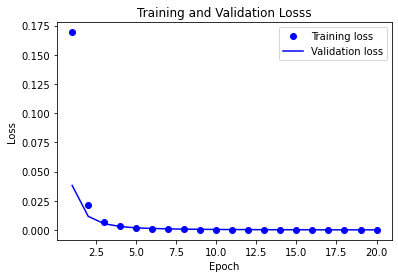

In [22]:
acc = history_dictionary['acc']
val_acc = history_dictionary['val_acc']
loss = history_dictionary['loss']
val_loss = history_dictionary['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Losss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### Conclusion

I got the expected result with accuracy score is 1.0 and as we known, it's the best score for a model. In this case, I used Keras model where Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code.